# Обработка данных статического зондирования скважин

## Содержание <a id='Content'></a>

[Постановка задачи](#Task_init)    
[Импорт таблиц СП](#SP_tables_import)    
[Чтение данных статического зондирования](#CPT_data)    
[Вычисление несущих способностей для конкретного вида свай](#Pile_BC)    
[Статистическая обработка по ГОСТ 20522-2012](#Stats_by_GOST_20522)    
[Просмотр графиков несущей способности для разных свай](#Graphs)    
[Оценка стоимости для разных свай](#Prices)

Задача данной тетрабки является преобразование неподготовленных результатов статзондирования в удобную форму для машинной обработки. 

## [Импорт таблиц СП](#Content) <a id='SP_tables_import'></a>

In [45]:
import pandas as pd
import os
common_path = r'C:\Users\panedviga\01_Python code\Pile_optimisation'

In [46]:
Betta_f = pd.read_csv(os.path.join(common_path,'Betta_f.csv'), sep = ';',decimal=',')
Betta1_q = pd.read_csv(os.path.join(common_path,'Betta1_q.csv'), sep = ';',decimal=',')
Betta_f

,soil_type,f_kPa,beta_i
0,sand,0.0,0.75
1,sand,20.0,0.75
2,sand,40.0,0.60
3,sand,60.0,0.55
4,sand,80.0,0.50
5,sand,100.0,0.45
6,sand,120.0,0.40
7,clay,0.0,1.00
8,clay,20.0,1.00
9,clay,40.0,0.75


In [47]:
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder().fit(Betta_f.soil_type)
oe.classes_

array(['clay', 'sand'], dtype=object)

In [48]:
Betta_f.soil_type = oe.transform(Betta_f.soil_type)
Betta_f

,soil_type,f_kPa,beta_i
0,1,0.0,0.75
1,1,20.0,0.75
2,1,40.0,0.60
3,1,60.0,0.55
4,1,80.0,0.50
5,1,100.0,0.45
6,1,120.0,0.40
7,0,0.0,1.00
8,0,20.0,1.00
9,0,40.0,0.75


## [Чтение данных статического зондирования](#Content) <a id='CPT_data'></a>

In [49]:
from os import walk

bore_data_dir = r"CPTs"
f = []
for (dirpath, dirnames, filenames) in walk(os.path.join(common_path,bore_data_dir)):
    f.extend(filenames)
    break
CPTs_data = dict()
f

['10_18.csv',
 '11_18.csv',
 '12_18.csv',
 '15_18.csv',
 '18_18.csv',
 '19_18.csv',
 '1_18.csv',
 '25_18.csv',
 '5_18.csv']

In [50]:
# Читаем все скважины и данные по их статзондированию
for file_name in f:
    data = pd.read_csv(os.path.join(common_path,'CPTs',file_name), 
                       sep = ';',
                       usecols =[0,1,2,3],
                       decimal=',').dropna(thresh = 3)
    
    display(data.info())
    data.soil_type = oe.transform(data.soil_type)
    CPTs_data[file_name[:-4]] = data  # формируем
# CPTs_data['19_18'].head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    194 non-null    float64
 1   q_MPa      194 non-null    float64
 2   f_kPa      194 non-null    int64  
 3   soil_type  194 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 7.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    159 non-null    float64
 1   q_MPa      159 non-null    float64
 2   f_kPa      159 non-null    int64  
 3   soil_type  159 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    169 non-null    float64
 1   q_MPa      169 non-null    float64
 2   f_kPa      169 non-null    int64  
 3   soil_type  169 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    172 non-null    float64
 1   q_MPa      172 non-null    float64
 2   f_kPa      172 non-null    int64  
 3   soil_type  172 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    170 non-null    float64
 1   q_MPa      170 non-null    float64
 2   f_kPa      170 non-null    int64  
 3   soil_type  170 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    147 non-null    float64
 1   q_MPa      147 non-null    float64
 2   f_kPa      147 non-null    int64  
 3   soil_type  147 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    171 non-null    float64
 1   q_MPa      171 non-null    float64
 2   f_kPa      171 non-null    float64
 3   soil_type  171 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    134 non-null    float64
 1   q_MPa      134 non-null    float64
 2   f_kPa      134 non-null    int64  
 3   soil_type  134 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   depth_m    187 non-null    float64
 1   q_MPa      187 non-null    float64
 2   f_kPa      187 non-null    int64  
 3   soil_type  187 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 7.3+ KB


None

In [51]:
CPTs_data['25_18'].head(30)

,depth_m,q_MPa,f_kPa,soil_type
0,3.3,1.4,21,1
1,3.4,0.4,19,1
2,3.5,13.2,29,1
3,3.6,18.2,50,1
4,3.7,18.6,73,1
5,3.8,19.9,97,1
6,3.9,14.9,115,1
7,4.0,9.8,103,1
8,4.1,8.2,82,1
9,4.2,9.2,67,1


Читаем данные об отметках скважин. Они нам пригодятся для дальнейших вычислений. 

In [52]:
Boring_elev = pd.read_csv(os.path.join(common_path,'Boring_elev.csv'), 
                   sep = ';',
                   usecols =[0,1,2,3],
                   decimal=',').dropna(thresh = 3)
display(Boring_elev)
Boring_elev.info()

,CPT_label,bore_elevation_m,pile_top_elevation_m,CPT_top_elevation_m
0,1_18,38.9,38.5,36.6
1,5_18,38.5,38.5,37.2
2,10_18,38.1,38.5,36.6
3,11_18,38.5,38.5,36.4
4,12_18,38.2,38.5,36.4
5,15_18,37.8,38.5,36.5
6,18_18,37.9,38.5,35.5
7,19_18,37.6,38.5,33.9
8,25_18,37.0,38.5,33.7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPT_label             9 non-null      object 
 1   bore_elevation_m      9 non-null      float64
 2   pile_top_elevation_m  9 non-null      float64
 3   CPT_top_elevation_m   9 non-null      float64
dtypes: float64(3), object(1)
memory usage: 360.0+ bytes


Интерполируем данные по коэффициентам $\beta$ из таблиц СП.24.13330.2011

In [53]:
# bore_elevation - отметка скважины
# pile_top_elevation - отметка верха сваи
# CPT_top_elevation - верхняя точка статзондирования


def fill_heigths(data, bore_elevation, pile_top_elevation, CPT_top_elevation):
    elev_delta = bore_elevation - pile_top_elevation

    data['pile_length_m'] = data['depth_m'] - elev_delta
    data['abs_elevation_m'] = bore_elevation - data['depth_m'] 
    
    return data

for key in CPTs_data.keys():
    row = Boring_elev.query('CPT_label == @key')
    bore_elevation = float(row['bore_elevation_m'])
    pile_top_elevation = float(row['pile_top_elevation_m'])
    CPT_top_elevation = float(row['CPT_top_elevation_m'])
    fill_heigths(CPTs_data[key], bore_elevation,pile_top_elevation,CPT_top_elevation)

In [54]:
CPTs_data['25_18'].head(30)

,depth_m,q_MPa,f_kPa,soil_type,pile_length_m,abs_elevation_m
0,3.3,1.4,21,1,4.8,33.7
1,3.4,0.4,19,1,4.9,33.6
2,3.5,13.2,29,1,5.0,33.5
3,3.6,18.2,50,1,5.1,33.4
4,3.7,18.6,73,1,5.2,33.3
5,3.8,19.9,97,1,5.3,33.2
6,3.9,14.9,115,1,5.4,33.1
7,4.0,9.8,103,1,5.5,33.0
8,4.1,8.2,82,1,5.6,32.9
9,4.2,9.2,67,1,5.7,32.8


In [55]:
betta_f_merged = Betta_f.set_index(['soil_type','f_kPa'])
Betta1_q_merged = Betta1_q.set_index('q_kPa')
for key in CPTs_data.keys():
    data = CPTs_data[key]
    
    f_kPa = data.loc[:,['f_kPa','soil_type']].drop_duplicates()
    f_kPa = f_kPa.set_index(['soil_type','f_kPa'])
    betta_f_merged = pd.concat([betta_f_merged, f_kPa], axis=1)
    
    data['q_kPa'] = data['q_MPa'] * 1000
    
    q_kPa = data.loc[:,['q_kPa']].drop_duplicates()
    q_kPa = q_kPa.set_index('q_kPa')
    Betta1_q_merged = pd.concat([Betta1_q_merged, q_kPa], axis=1)
#     display(data)
betta_f_merged = betta_f_merged.interpolate(method = 'linear', axis = 0)    
Betta1_q_merged = Betta1_q_merged.interpolate(method = 'linear', axis = 0)  
display(betta_f_merged)
display(Betta1_q_merged)

beta_i
soil_type f_kPa        
0         0.0       1.0
          7.0       1.0
          8.0       1.0
          9.0       1.0
          10.0      1.0
...                 ...
1         159.0     0.4
          161.0     0.4
          166.0     0.4
          177.0     0.4
          206.0     0.4

[181 rows x 1 columns]

,beta_1
q_kPa,
0.0,0.9
120.0,0.9
200.0,0.9
240.0,0.9
300.0,0.9
...,...
32200.0,0.2
33300.0,0.2
36200.0,0.2


In [56]:
Betta1_q_merged.loc[13200.0]

beta_1    0.386538
Name: 13200.0, dtype: float64

In [57]:
for key in CPTs_data.keys():
    CPTs_data[key] = CPTs_data[key].merge(betta_f_merged,
                         left_on = ['soil_type','f_kPa'],
                         right_index = True, how = 'left').sort_values('depth_m')
    
    CPTs_data[key] = CPTs_data[key].merge(Betta1_q_merged,
                                          left_on = 'q_kPa',
                                          right_index = True, how = 'left').sort_values('depth_m')

C:\Users\panedviga\AppData\Roaming\Python\Python37\site-packages\pandas\core\reshape\merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [58]:
CPTs_data['25_18'].head(30)

,depth_m,q_MPa,f_kPa,soil_type,pile_length_m,abs_elevation_m,q_kPa,beta_i,beta_1
0,3.3,1.4,21,1,4.8,33.7,1400.0,0.742500,0.876471
1,3.4,0.4,19,1,4.9,33.6,400.0,0.750000,0.900000
2,3.5,13.2,29,1,5.0,33.5,13200.0,0.682500,0.386538
3,3.6,18.2,50,1,5.1,33.4,18200.0,0.575000,0.315957
4,3.7,18.6,73,1,5.2,33.3,18600.0,0.517500,0.311702
5,3.8,19.9,97,1,5.3,33.2,19900.0,0.457692,0.301064
6,3.9,14.9,115,1,5.4,33.1,14900.0,0.411111,0.351923
7,4.0,9.8,103,1,5.5,33.0,9800.0,0.438889,0.456897
8,4.1,8.2,82,1,5.6,32.9,8200.0,0.492308,0.522414
9,4.2,9.2,67,1,5.7,32.8,9200.0,0.532500,0.484483


## [Вычисление несущих способностей для конкретного вида свай](#Content)<a id='Pile_BC'></a>

In [59]:
import numpy as np
import math
def get_pile_data(bore_profile, diameter, shape, h_layer = 0.1, gamma_c_g = 1.25):
    # параметры сваи
    if shape == 'circular':
        area = np.pi * diameter **2 / 4
        perimeter = diameter * np.pi
    else:
        area = diameter ** 2
        perimeter = diameter *4 
    
    # слои
    pile_data = pd.DataFrame(bore_profile.copy().pile_length_m)
    pile_data['h_i'] = pile_data['pile_length_m'] - pile_data['pile_length_m'].shift()
    pile_data.loc[0,'h_i'] = 0
    
    window_top_delta = math.ceil(diameter/h_layer)
    window_bottom_delta = math.ceil(4*diameter/h_layer)
    
    
    pile_data['q_s_kPa'] = bore_profile['q_kPa'].rolling(window_top_delta + window_bottom_delta+1).mean().shift(-window_bottom_delta)
    
    # сопротивление по острию
    pile_data['R_A_kN'] = pile_data['q_s_kPa'] * bore_profile['beta_1'] * area    
    
    # сопротивление по боковой поверхности
    pile_data['side_bearing_cap'] = pile_data['h_i'] * bore_profile['f_kPa'] * bore_profile['beta_i'] * perimeter    
    pile_data['side_bearing_cumulative_summary'] = pile_data['side_bearing_cap'].cumsum()
    
    # Итоговое сопротивление
    pile_data['F_u_kN'] = pile_data['R_A_kN'] + pile_data['side_bearing_cumulative_summary']
    pile_data['N_kN'] = pile_data['F_u_kN'] / gamma_c_g
    
    return pile_data
get_pile_data(CPTs_data['25_18'],0.3,"circular", h_layer = 0.1).head(20) # Просто проверяем, как работает

,pile_length_m,h_i,q_s_kPa,R_A_kN,side_bearing_cap,side_bearing_cumulative_summary,F_u_kN,N_kN
0,4.8,0.0,NaN,NaN,0.000000,0.000000,NaN,NaN
1,4.9,0.1,NaN,NaN,1.343031,1.343031,NaN,NaN
2,5.0,0.1,NaN,NaN,1.865399,3.208430,NaN,NaN
3,5.1,0.1,8175.00,182.578127,2.709624,5.918054,188.496181,150.796945
4,5.2,0.1,8118.75,178.879810,3.560445,9.478499,188.358310,150.686648
5,5.3,0.1,8187.50,174.237763,4.184239,13.662738,187.900501,150.320401
6,5.4,0.1,7406.25,184.237701,4.455826,18.118564,202.356264,161.885011
7,5.5,0.1,6312.50,203.869220,4.260523,22.379087,226.248307,180.998646
8,5.6,0.1,5193.75,191.790931,3.804710,26.183797,217.974728,174.379782
9,5.7,0.1,4012.50,137.412349,3.362525,29.546322,166.958671,133.566937


In [60]:
%%time
get_pile_data(CPTs_data['25_18'],0.3,"circular").dropna(axis = 0).set_index('pile_length_m') # проверка последующей обработки

Wall time: 6.98 ms


,h_i,q_s_kPa,R_A_kN,side_bearing_cap,side_bearing_cumulative_summary,F_u_kN,N_kN
pile_length_m,,,,,,,
5.1,0.1,8175.00,182.578127,2.709624,5.918054,188.496181,150.796945
5.2,0.1,8118.75,178.879810,3.560445,9.478499,188.358310,150.686648
5.3,0.1,8187.50,174.237763,4.184239,13.662738,187.900501,150.320401
5.4,0.1,7406.25,184.237701,4.455826,18.118564,202.356264,161.885011
5.5,0.1,6312.50,203.869220,4.260523,22.379087,226.248307,180.998646
...,...,...,...,...,...,...,...
16.5,0.1,11637.50,336.952237,2.446672,263.424641,600.376878,480.301503
16.6,0.1,12187.50,324.713053,2.137540,265.562180,590.275234,472.220187
16.7,0.1,12962.50,389.412681,1.990513,267.552694,656.965375,525.572300


Импортируем интересующие нас варианты свай. 

In [61]:
pile_variants = pd.read_csv(os.path.join(common_path,'pile_variants.csv'), sep = ';',decimal=',')
pile_variants

,type,diameter
0,circular,0.30
1,rectangular,0.30
2,circular,0.35
3,rectangular,0.35
4,circular,0.40
5,rectangular,0.40


In [62]:
get_pile_data(CPTs_data['10_18'],
                      0.30,
                      'circular')

,pile_length_m,h_i,q_s_kPa,R_A_kN,side_bearing_cap,side_bearing_cumulative_summary,F_u_kN,N_kN
0,1.9,0.0,NaN,NaN,0.000000,0.000000,NaN,NaN
1,2.0,0.1,NaN,NaN,4.329115,4.329115,NaN,NaN
2,2.1,0.1,NaN,NaN,5.353274,9.682389,NaN,NaN
3,2.2,0.1,5637.50,244.673715,4.561593,14.243981,258.917696,207.134157
4,2.3,0.1,5081.25,236.829300,4.068604,18.312585,255.141885,204.113508
...,...,...,...,...,...,...,...,...
189,20.8,0.1,NaN,NaN,2.446672,445.759097,NaN,NaN
190,20.9,0.1,NaN,NaN,3.591783,449.350880,NaN,NaN
191,21.0,0.1,NaN,NaN,3.496357,452.847237,NaN,NaN
192,21.1,0.1,NaN,NaN,3.955507,456.802743,NaN,NaN


И теперь генерируем массив данных по каждому варианту свай

In [63]:
pile_variants_bearing_capacity = dict()
for index, row in pile_variants.iterrows():
    piles = pd.DataFrame()
    for key in CPTs_data.keys():
#         
        one_pile = pd.DataFrame(get_pile_data(CPTs_data[key],
                      row['diameter'],
                      row['type'])[['N_kN','pile_length_m']])
        
        one_pile['pile_length_m'] = (round(one_pile['pile_length_m']*10,0)).map(int)
        one_pile = one_pile.set_index('pile_length_m')
#         display(one_pile.index)
        one_pile.columns = [key]             
        
        piles = piles.merge(one_pile,how = 'outer', left_index = True,right_index = True)
#         display(piles.head(20))
        
    piles = piles.rename(index = dict(zip(piles.index,piles.index / 10)))
    
    pile_variants_bearing_capacity[str(row['diameter'])+'_'+row['type']] = piles.dropna(axis = 0, how='all').T
pile_variants_bearing_capacity['0.3_rectangular']

pile_length_m,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,...,19.1,19.2,19.3,19.4,19.5,19.6,19.7,19.8,19.9,20.0
10_18,NaN,NaN,NaN,NaN,NaN,NaN,263.731400,259.885390,235.666339,259.311820,...,676.918467,646.58167,699.875037,751.47628,785.089107,816.449186,855.89942,872.449407,748.68255,903.502573
11_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.510096,246.832634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.573843,212.652540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.329591,296.933665,240.902935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_18,NaN,NaN,NaN,NaN,NaN,NaN,424.150213,417.935709,402.541435,396.652107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5_18,208.975454,293.476883,345.728453,354.220234,341.772953,347.295578,342.841703,342.729766,295.360021,316.456763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## [Статистическая обработка по ГОСТ 20522-2012 ](#Content) <a id='Stats_by_GOST_20522'></a>

In [64]:
student = pd.read_csv(os.path.join(common_path,'Student.csv'), sep = ';',decimal=',')
student = student.set_index('K=n-1')
v_criteria = pd.read_csv(os.path.join(common_path,'v_criteria.csv'), sep = ';',decimal=',')
v_criteria = v_criteria.set_index('n')

In [65]:
val = pd.Series([498.8,498.8,455.5,410.1,455.5,455.5])

val2 = pd.Series([435.6,435.6,386.4,371,386.4,15000,100])


In [66]:
def stat_process(val):
    count = 0
    result = 0
    count_red = val.count()
    while count != count_red:
        if val.count() >=6:
            count = val.count()
            S = np.std(val, ddof =1)
            mean = val.mean()       
            v = v_criteria.loc[count,'v']
            mask = abs(mean - val) - v*S < 0
#             print(mask)
            val = val[mask]
            count_red = val.count()
            V = S / mean 
            t_a = student.loc[(val.count()-1),'0,95']#(коэффициент стьюдента)
            r_a = t_a * V /(count)**0.5 # ро_альфа
            gamma_g = 1/(1-r_a)# гамма_g
            result = mean/gamma_g
#             print(V)
            
        else:            
            return val.min() 
    if result !=0:
        return result
    else:
        return 'mistake'
stat_process(val2)

248.56910847202352

In [67]:
for i in pile_variants_bearing_capacity.keys():
    calculated_values = []
    columns = pile_variants_bearing_capacity[i].columns
    for col in columns:
        calculated_values.append(stat_process(pile_variants_bearing_capacity[i][col]))        
    df  = pd.DataFrame(calculated_values, columns = ['N_kPa']).T
    df.columns = columns
    
    
    pile_variants_bearing_capacity[i] = pile_variants_bearing_capacity[i].append(df).T
    display(pile_variants_bearing_capacity[i])

,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.128938,164.128938
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.496205,230.496205
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.534492,271.534492
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.203921,278.203921
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268.427850,268.427850
...,...,...,...,...,...,...,...,...,...,...
19.6,641.237691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.237691
19.7,672.221833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672.221833
19.8,685.220162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.220162


,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.975454,208.975454
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.476883,293.476883
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.728453,345.728453
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,354.220234,354.220234
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341.772953,341.772953
...,...,...,...,...,...,...,...,...,...,...
19.6,816.449186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,816.449186
19.7,855.899420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855.899420
19.8,872.449407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,872.449407


,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.955239,352.955239
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.076201,401.076201
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.758791,393.758791
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.248409,372.248409
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.932817,345.932817
...,...,...,...,...,...,...,...,...,...,...
19.4,739.906192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739.906192
19.5,810.792165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810.792165
19.6,915.433429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,915.433429


,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.396567,449.396567
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.666079,510.666079
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501.349263,501.349263
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473.961395,473.961395
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.455342,440.455342
...,...,...,...,...,...,...,...,...,...,...
19.4,942.077823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,942.077823
19.5,1032.332647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.332647
19.6,1165.566042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1165.566042


,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454.330054,454.330054
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497.838527,497.838527
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.069907,477.069907
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.317975,449.317975
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412.805487,412.805487
...,...,...,...,...,...,...,...,...,...,...
19.2,748.637087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,748.637087
19.3,846.597737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,846.597737
19.4,972.386492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.386492


,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.470991,578.470991
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,633.867699,633.867699
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607.424271,607.424271
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.089414,572.089414
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525.600271,525.600271
...,...,...,...,...,...,...,...,...,...,...
19.2,953.194344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953.194344
19.3,1077.921717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1077.921717
19.4,1238.080935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1238.080935


In [68]:
pile_variants_bearing_capacity['0.4_rectangular']

,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,578.470991,578.470991
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,633.867699,633.867699
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607.424271,607.424271
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,572.089414,572.089414
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525.600271,525.600271
...,...,...,...,...,...,...,...,...,...,...
19.2,953.194344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,953.194344
19.3,1077.921717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1077.921717
19.4,1238.080935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1238.080935


In [69]:
pile_variants_bearing_capacity['0.4_circular']

,10_18,11_18,12_18,15_18,18_18,19_18,1_18,25_18,5_18,N_kPa
pile_length_m,,,,,,,,,,
1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454.330054,454.330054
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497.838527,497.838527
1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.069907,477.069907
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.317975,449.317975
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412.805487,412.805487
...,...,...,...,...,...,...,...,...,...,...
19.2,748.637087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,748.637087
19.3,846.597737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,846.597737
19.4,972.386492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.386492


## [Просмотр графиков несущей способности для разных свай](#Content) <a id='Graphs'></a>

Объединим таблицы расчета несущих способностей

In [70]:
pile_bc = pd.DataFrame()
for key in pile_variants_bearing_capacity.keys():
    df = pd.DataFrame(pile_variants_bearing_capacity[key]['N_kPa'])
    df.columns = [key]
#     print(df)
    pile_bc  = pile_bc.merge(df, right_index = True, left_index = True, how = 'outer')
pile_bc

,0.3_circular,0.3_rectangular,0.35_circular,0.35_rectangular,0.4_circular,0.4_rectangular
pile_length_m,,,,,,
1.6,164.128938,208.975454,NaN,NaN,NaN,NaN
1.7,230.496205,293.476883,352.955239,449.396567,454.330054,578.470991
1.8,271.534492,345.728453,401.076201,510.666079,497.838527,633.867699
1.9,278.203921,354.220234,393.758791,501.349263,477.069907,607.424271
2.0,268.427850,341.772953,372.248409,473.961395,449.317975,572.089414
...,...,...,...,...,...,...
19.6,641.237691,816.449186,915.433429,1165.566042,1280.355525,1630.199286
19.7,672.221833,855.899420,983.164539,1251.803970,NaN,NaN
19.8,685.220162,872.449407,984.902917,1254.017342,NaN,NaN


In [71]:
pile_bc.to_csv(os.path.join(common_path,'pile_bc.csv'))

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
piles_data = pile_bc.reset_index()
piles_data

,pile_length_m,0.3_circular,0.3_rectangular,0.35_circular,0.35_rectangular,0.4_circular,0.4_rectangular
0,1.6,164.128938,208.975454,NaN,NaN,NaN,NaN
1,1.7,230.496205,293.476883,352.955239,449.396567,454.330054,578.470991
2,1.8,271.534492,345.728453,401.076201,510.666079,497.838527,633.867699
3,1.9,278.203921,354.220234,393.758791,501.349263,477.069907,607.424271
4,2.0,268.427850,341.772953,372.248409,473.961395,449.317975,572.089414
...,...,...,...,...,...,...,...
180,19.6,641.237691,816.449186,915.433429,1165.566042,1280.355525,1630.199286
181,19.7,672.221833,855.899420,983.164539,1251.803970,NaN,NaN
182,19.8,685.220162,872.449407,984.902917,1254.017342,NaN,NaN
183,19.9,588.013900,748.682550,NaN,NaN,NaN,NaN


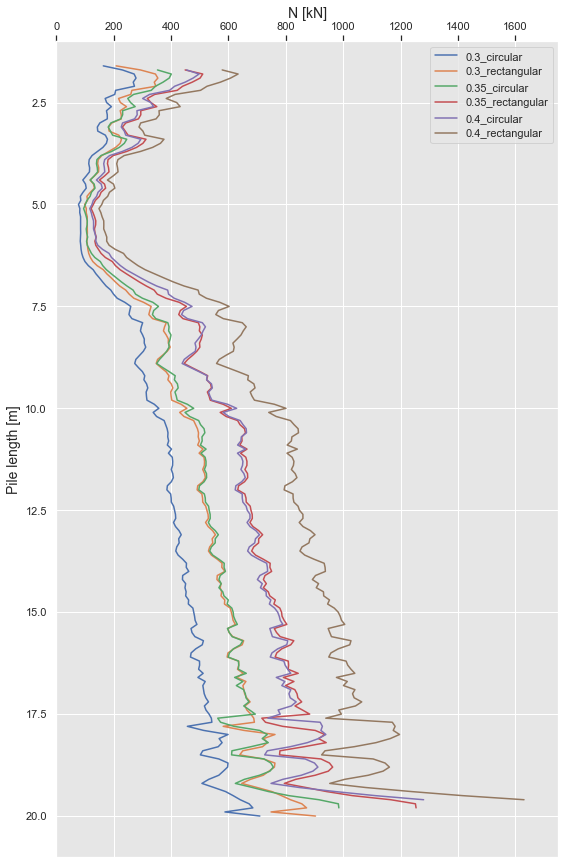

In [88]:
x = np.arange(piles_data['pile_length_m'].min(), piles_data['pile_length_m'].max()+0.1, 0.1)
fig, ax = plt.subplots() #figsize=(15, 20)

for col in piles_data.columns[1:]:
    sns.lineplot(x=col,y="pile_length_m", ax=ax, sort = False,  data=piles_data, label=col)
    ax.xaxis.tick_top()
    fig.set_size_inches(9, 15)
    ax.set(xlim = (0,1750), ylim = (21,1))
    plt.xlabel("N [kN]", fontsize=14)
    plt.ylabel("Pile length [m]", fontsize=14)
    ax.xaxis.set_label_position('top') 
#     ax.fill_betweenx( x, piles_data[col], color="red", alpha=0.1)

## [Оценка стоимости для разных свай](#Content) <a id='Prices'></a>

Воспользуемся любым прайс-листом в свободном доступе. Скопируем из интернета и чистим, пишем в CSV. у меня взято [отсюда](https://monolit47.ru/jbi-zabivnie-svai.html)

Приводим к виду: **марка** (табуляция) **цена**
```
mark	price
С60.30.4-8	5990
С80.35.8-12	7910
С90.35.6-12	8570
С100.35.6-12	9640
С110.35.6-12	10510
С120.35.6-12	10080
С130.35.7-13	13990
С140.35.8-13	15390
С150.35.8-13	16590
С160.35.8-13	18590
С120.40.6-13	14390
С130.40.7-13	17590
С150.40.8-13	20240
С160.40.8-13	21090
```
И читаем файл

In [74]:
pile_prices = pd.read_csv(os.path.join(common_path,'pile_prices.csv'), sep = '\t',decimal=',')
pile_prices

,mark,price
0,С60.30.4-8,5990
1,С80.35.8-12,7910
2,С90.35.6-12,8570
3,С100.35.6-12,9640
4,С110.35.6-12,10510
5,С120.35.6-12,10080
6,С130.35.7-13,13990
7,С140.35.8-13,15390
8,С150.35.8-13,16590
9,С160.35.8-13,18590


Дешифруем параметры сваи + добавляем признаки. Нам надо получить модель линейной регрессии для оценки цены сваи с заданными параметрами. 

In [75]:
import re
def decompose_pile_info(row):
    mark = row['mark']    
    splitted = re.split('\.|\-', mark[1:])
    length = float(splitted[0])/10
    diameter = float(splitted[1])/100
    volume = length * diameter **2
    return length,diameter,volume
pile_prices['length'], pile_prices['diameter'],pile_prices['volume']  = zip(*pile_prices.apply(decompose_pile_info,axis = 1))
# re.split('\.|\-',pile_prices.loc[0,'mark'][1:])
pile_prices

,mark,price,length,diameter,volume
0,С60.30.4-8,5990,6.0,0.30,0.5400
1,С80.35.8-12,7910,8.0,0.35,0.9800
2,С90.35.6-12,8570,9.0,0.35,1.1025
3,С100.35.6-12,9640,10.0,0.35,1.2250
4,С110.35.6-12,10510,11.0,0.35,1.3475
5,С120.35.6-12,10080,12.0,0.35,1.4700
6,С130.35.7-13,13990,13.0,0.35,1.5925
7,С140.35.8-13,15390,14.0,0.35,1.7150
8,С150.35.8-13,16590,15.0,0.35,1.8375
9,С160.35.8-13,18590,16.0,0.35,1.9600


In [76]:
pile_prices.corr()

,price,length,diameter,volume
price,1.000000,0.937516,0.723951,0.968044
length,0.937516,1.000000,0.589324,0.916615
diameter,0.723951,0.589324,1.000000,0.843593
volume,0.968044,0.916615,0.843593,1.000000


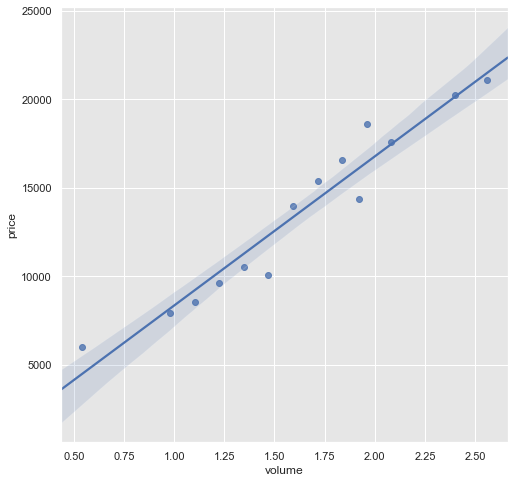

In [77]:
%matplotlib inline
# use the function regplot to make a scatterplot
fig, ax = plt.subplots()
sns.regplot(ax=ax,x=pile_prices["volume"], y=pile_prices["price"])
fig.set_size_inches(8, 8)

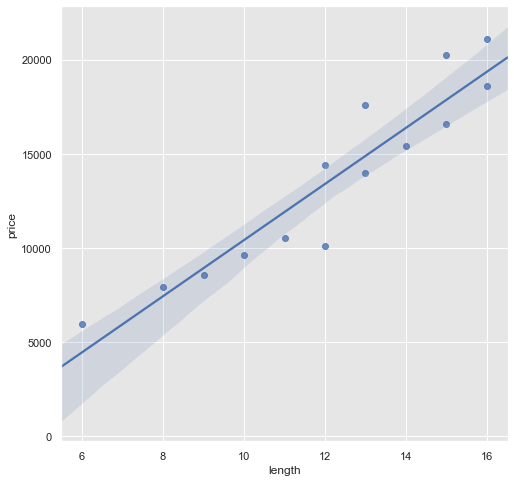

In [78]:
%matplotlib inline
# use the function regplot to make a scatterplot
fig, ax = plt.subplots()
sns.regplot(ax=ax,x=pile_prices["length"], y=pile_prices["price"])
fig.set_size_inches(8, 8)

Видим очень высокую корреляцию объем-цена. Подготовим регрессионную модель

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [80]:
lr.fit(pd.DataFrame(pile_prices["volume"]),pile_prices["price"])

LinearRegression()

In [81]:
lr.intercept_ 

-53.36874700563749

In [82]:
lr.coef_

array([8416.94511474])

Эти коэффициенты мы будем использовать для оценки цены свайного основания непосредственно в grasshopper. 

In [83]:
lr.predict([[1]])

array([8363.57636774])

In [84]:
lr.coef_+lr.intercept_ # проверили, что нашли корректные коэффициенты модели

array([8363.57636774])

## [Постановка задачи](#Content)<a id='Task_init'></a>